In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(cowplot))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(harmony))
suppressMessages(library(ArchR))

In [2]:
in_dir <- "../../results/10_stereo_seq/07_integrate_with_scrna"
out_dir <- "../../results/10_stereo_seq/12_fib_sub_clustering"

if(!dir.exists(out_dir)){
    dir.create(out_dir)
}

In [3]:
obj <- readRDS(glue::glue("{in_dir}/spatial.rds"))

In [4]:
obj

An object of class Seurat 
13649 features across 40566 samples within 1 assay 
Active assay: RNA (13649 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 4 dimensional reductions calculated: pca, umap, harmony, umap_harmony
 1 image present: image

In [5]:
Idents(obj) <- "cell_type"

In [6]:
unique(Idents(obj))

[1] Keratinocytes    Macrophages      Fibroblasts      cDC             
 [5] Pericytes        Melanocytes      Endothelial      T cells         
 [9] Mast cells       Neural           NK cells         Monocytes       
[13] Smooth Muscle    pDC              Plasma cells     Secretory cells 
[17] Langerhans cells B cells         
18 Levels: Keratinocytes Macrophages Fibroblasts cDC Pericytes ... B cells

In [7]:
obj.sub <- subset(obj, idents = c("Fibroblasts"))

Warning message:
“Not validating Seurat objects”


In [8]:
obj.sub

An object of class Seurat 
13649 features across 19381 samples within 1 assay 
Active assay: RNA (13649 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 4 dimensional reductions calculated: pca, umap, harmony, umap_harmony
 1 image present: image

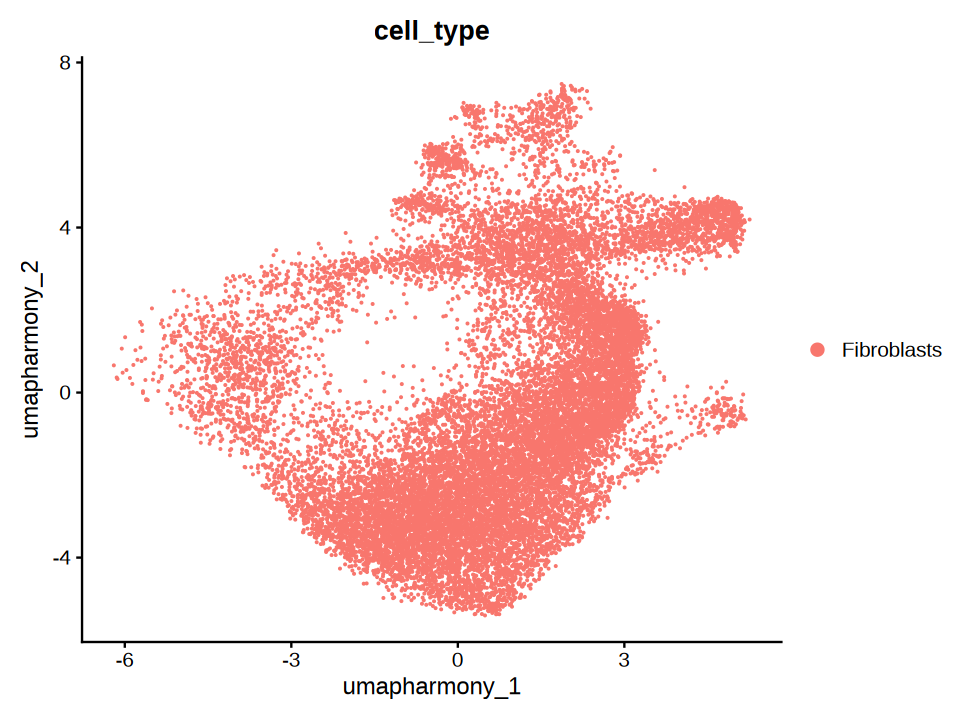

In [9]:
options(repr.plot.height = 6, repr.plot.width = 8)

DimPlot(obj.sub, group.by = "cell_type", reduction = "umap_harmony")

In [10]:
obj.sub <- RunUMAP(obj.sub, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony",
               reduction.ke = 'umapharmony_',
                   verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


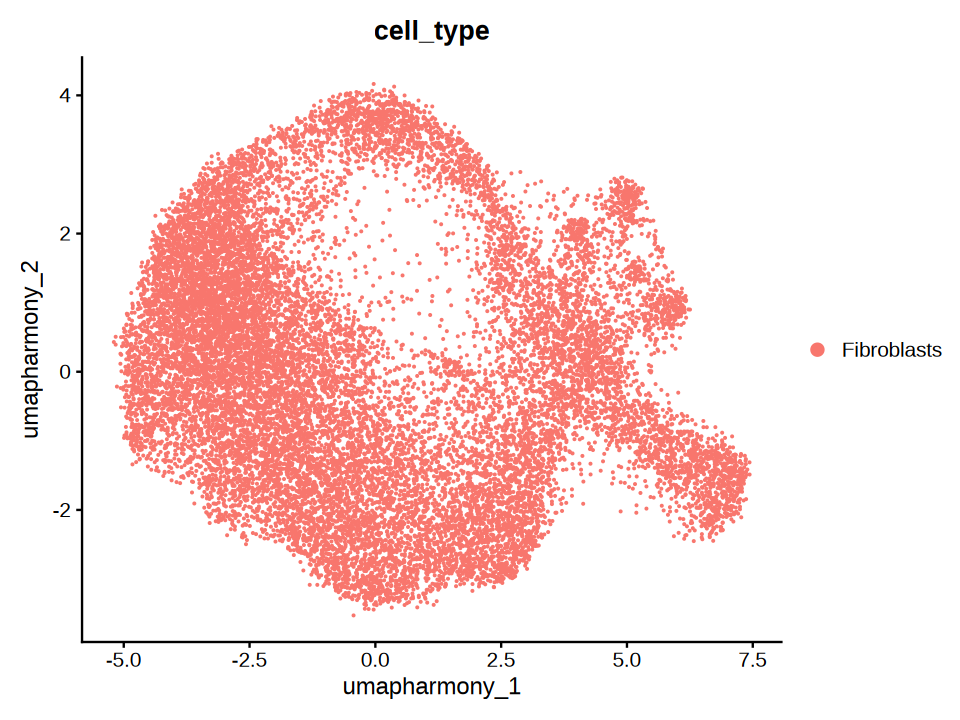

In [11]:
options(repr.plot.height = 6, repr.plot.width = 8)

DimPlot(obj.sub, group.by = "cell_type", reduction = "umap_harmony")

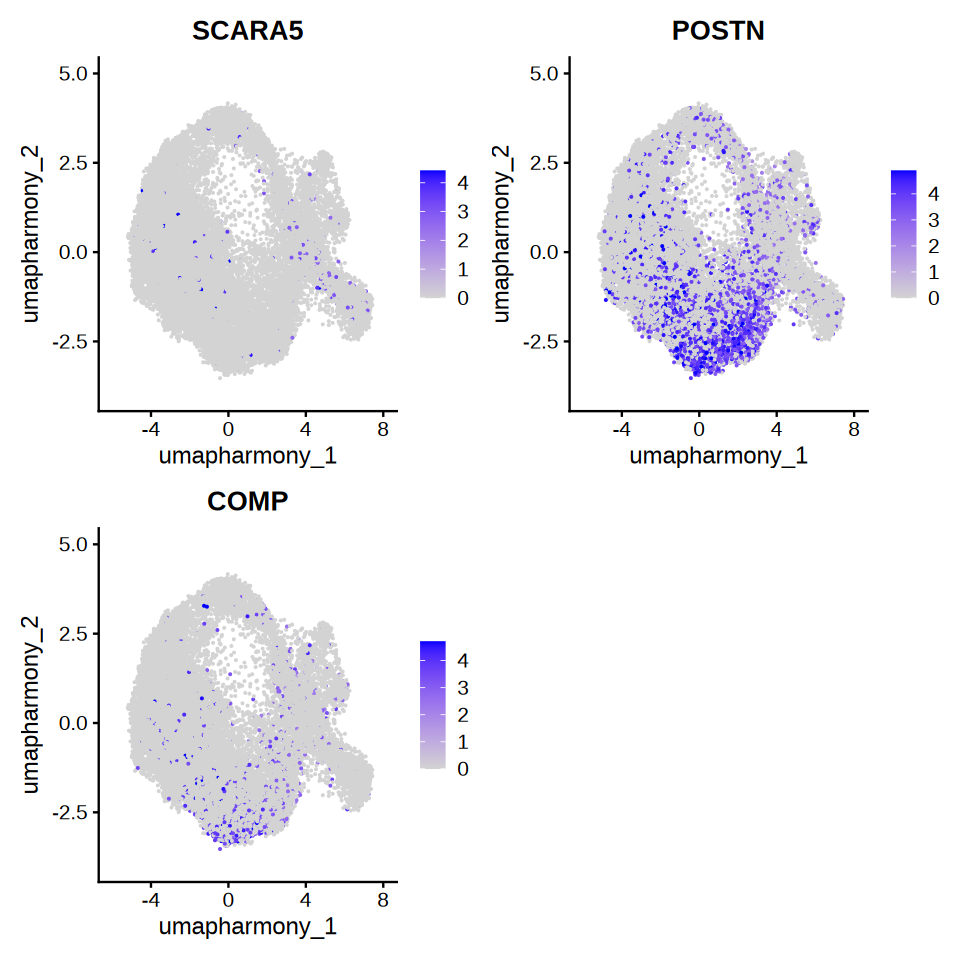

In [16]:
options(repr.plot.height = 8, repr.plot.width = 8)

FeaturePlot(obj.sub, features = c("SCARA5", "POSTN", "COMP"), reduction = "umap_harmony", max.cutoff = "q95")

In [19]:
obj.sub <- FindNeighbors(obj.sub, dims = 1:10, reduction = "harmony")
obj.sub <- FindClusters(obj.sub, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19381
Number of edges: 517783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 8
Elapsed time: 4 seconds


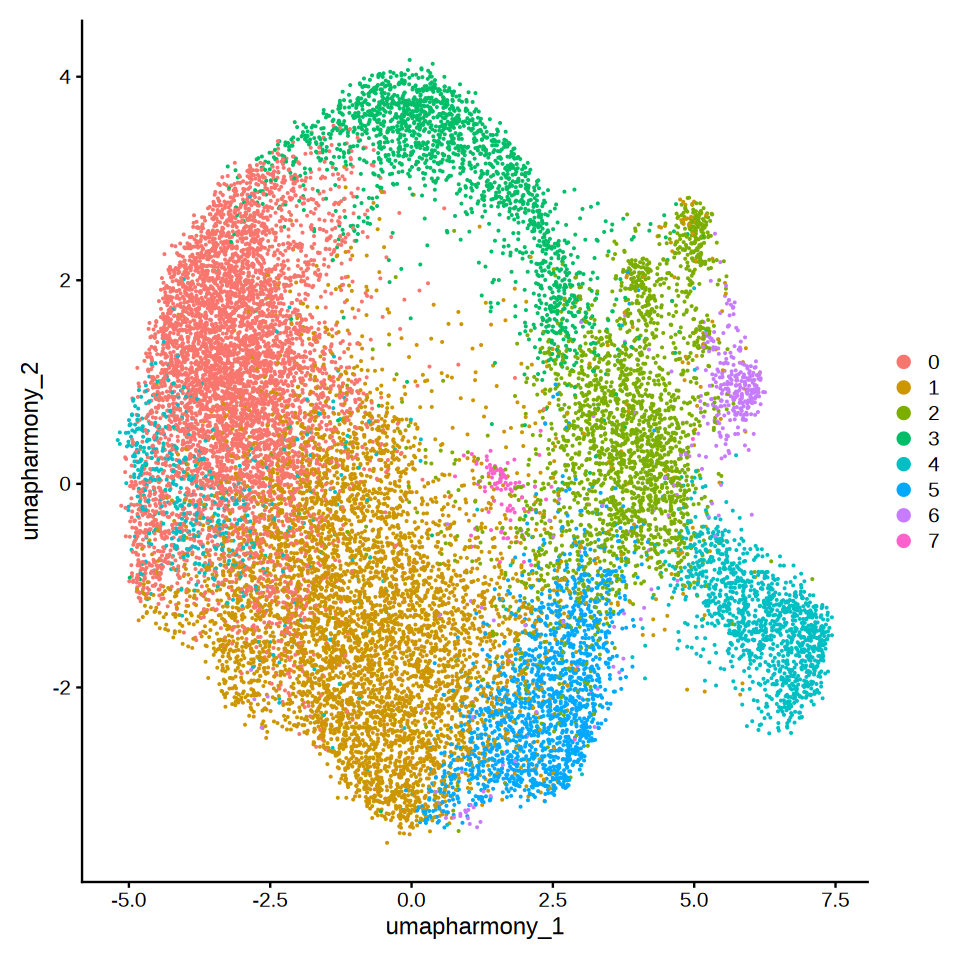

In [20]:
DimPlot(obj.sub, reduction = "umap_harmony")

In [30]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
all.markers <- FindAllMarkers(obj.sub, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [33]:
all.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

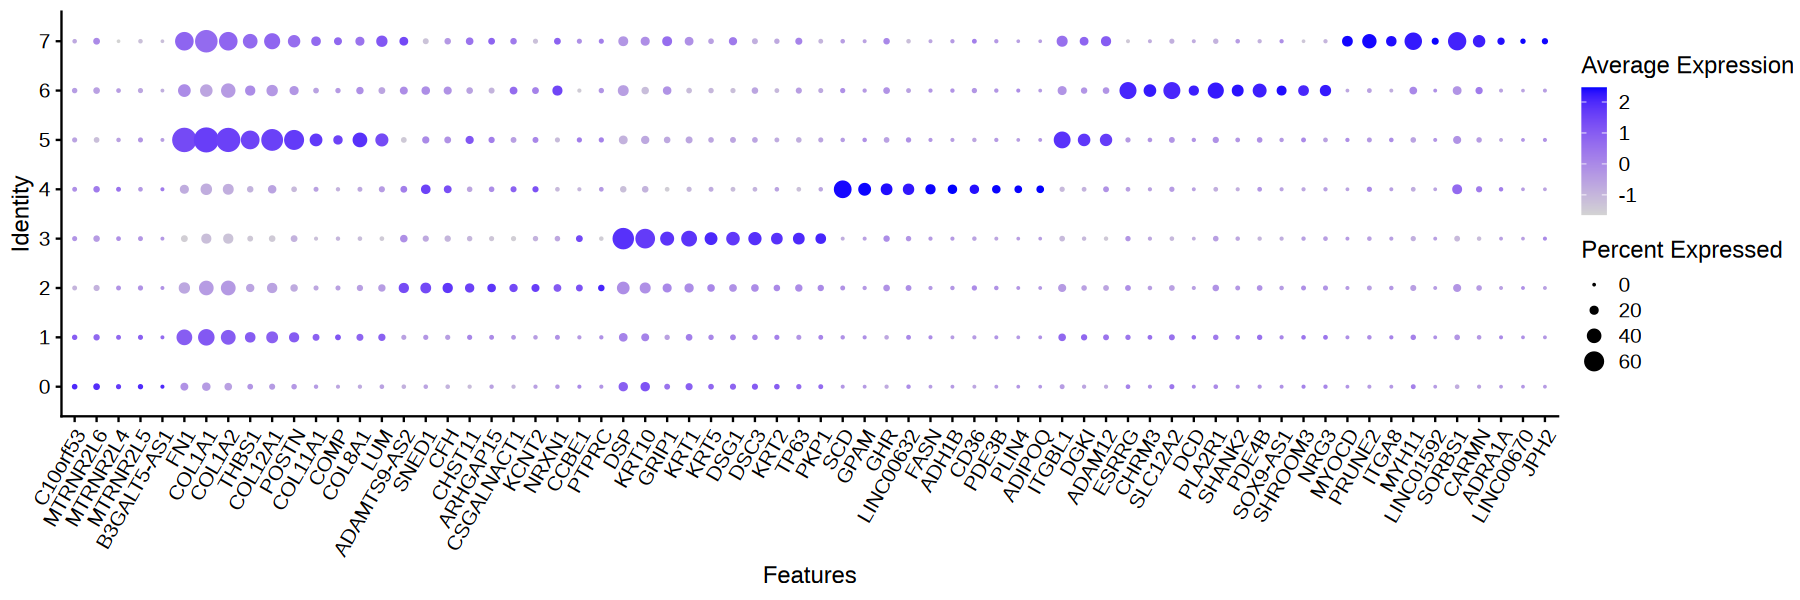

In [34]:
options(repr.plot.height = 5, repr.plot.width = 15)
DotPlot(object = obj.sub, features = unique(top10$gene)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [37]:
write.csv(all.markers, glue::glue("{out_dir}/markers.csv"), row.names = FALSE)